In [3]:
# https://future-chem.com/rdkit-3ddescriptor/

In [10]:
# ライブラリのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from rdkit import rdBase, Chem
print(rdBase.rdkitVersion) # 2020.09.3
from rdkit.Chem import AllChem, Descriptors, Descriptors3D, rdMolDescriptors, Draw
# 分子の読み込み
suppl = Chem.SDMolSupplier('./csv/platinum_dataset_2016_01.sdf')
mols = [x for x in suppl if x is not None]
len(mols) # 4548

2022.03.5


4626

/Users/keetane/opt/anaconda3/envs/pymol/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


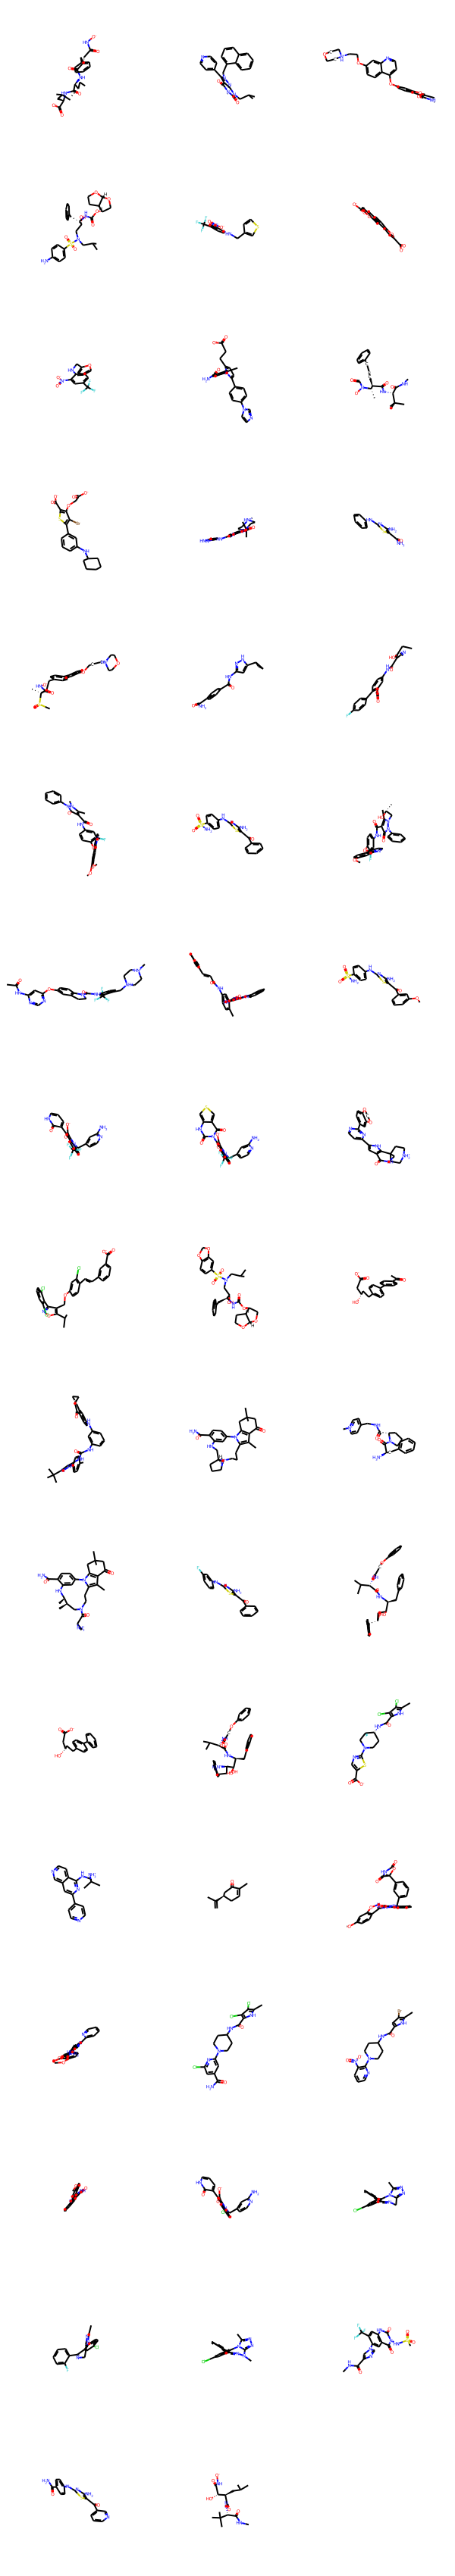

In [15]:
Draw.MolsToGridImage(mols)

In [4]:
flat = [Descriptors.FractionCSP3(mol) for mol in mols]
bins = [0,0.2,0.4,0.6,0.8,1.0]
pd.value_counts(pd.cut(flat, bins), sort=False)

(0.0, 0.2]    1088
(0.2, 0.4]    1458
(0.4, 0.6]     967
(0.6, 0.8]     369
(0.8, 1.0]     348
dtype: int64

(0.5, 1.005)

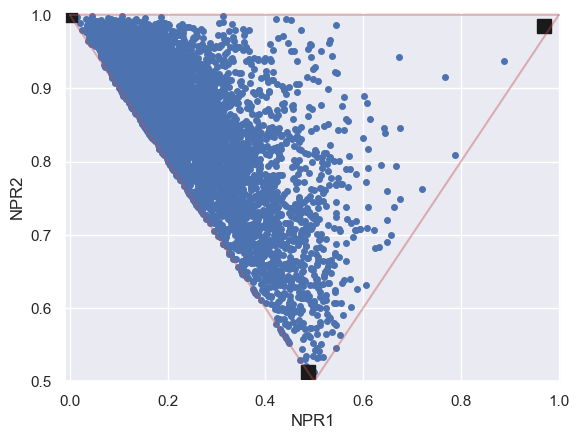

In [5]:
# reference molecules
benzene = AllChem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
acetylene = AllChem.AddHs(Chem.MolFromSmiles('C#C'))
adamantane = AllChem.AddHs(Chem.MolFromSmiles('C1C2CC3CC1CC(C2)C3'))

AllChem.EmbedMolecule(benzene, AllChem.ETKDGv3())
AllChem.EmbedMolecule(acetylene, AllChem.ETKDGv3())
AllChem.EmbedMolecule(adamantane, AllChem.ETKDGv3())

benzene = AllChem.RemoveHs(benzene)
acetylene = AllChem.RemoveHs(acetylene)
adamantane = AllChem.RemoveHs(adamantane)

ben_x, ben_y = Descriptors3D.NPR1(benzene), Descriptors3D.NPR2(benzene)
alkyne_x, alkyne_y = Descriptors3D.NPR1(acetylene), Descriptors3D.NPR2(acetylene)
adam_x, adam_y = Descriptors3D.NPR1(adamantane), Descriptors3D.NPR2(adamantane)

# plot
x = []
y = []
for m in mols:
    x.append(Descriptors3D.NPR1(m))
    y.append(Descriptors3D.NPR2(m))
xx = np.linspace(0,1,100)
plt.plot(x, y, 'o', ms=4)
plt.plot(ben_x, ben_y, 'ks', ms=10)
plt.plot(alkyne_x, alkyne_y, 'ks', ms=10)
plt.plot(adam_x, adam_y, 'ks', ms=10)

plt.plot(xx, 1-xx, 'r', alpha=0.4)
plt.plot(xx, np.ones(100), 'r', alpha=0.4)
plt.plot(xx, xx, 'r', alpha=0.4)
plt.xlabel('NPR1')
plt.ylabel('NPR2')
plt.xlim(-0.01,1.005)
plt.ylim(0.5,1.005)

(0.5, 1.0)

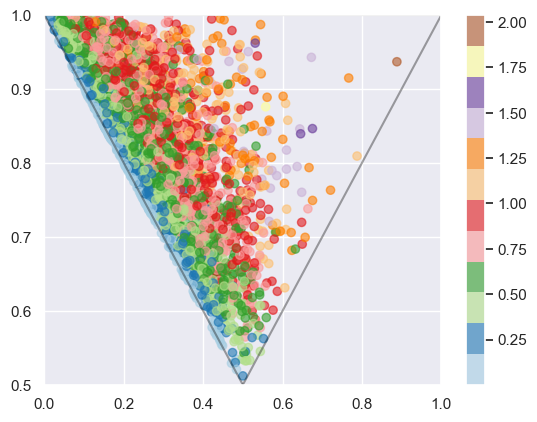

In [6]:
pbf = []
for mol in mols:
    pbf.append(rdMolDescriptors.CalcPBF(mol))
s2 = pd.Series(pbf)
s2.describe().round(2)

plt.scatter(x, y, vmin=min(pbf), vmax=max(pbf), c=pbf, cmap='Paired', alpha=0.6)
plt.plot(xx, 1-xx, 'k', alpha=0.4)
plt.plot(xx, np.ones(100), 'k', alpha=0.4)
plt.plot(xx, xx, 'k', alpha=0.4)
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0.5,1)